# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Introduction

In this worksheet we examine how to solve Ordinary Differential Equations (ODEs) using Python. ODEs are of course central to the study of physics as nearly all our descriptions of nature are formulated, and solved, using ODEs of some sort.

In PX1224 you studied how to solve differential equations using the simple Euler method and the Euler-Cromer method. Revise week 9 and 10 from last year and re-run your code to make sure you understand it. This week introduces you to a powerful method to solve ODEs which is faster and more robust than Euler or Euler-Cromer methods, and is capable of handling more complicated differential equations.

## The scipy library and odeint

The `scipy` library for Python includes many functions for scientific computing and data analysis. The function `odeint` will let us solve numerically one or more _first order_ ODEs using various sophisticated algorithms. It is used to find a solution $y(t)$ to a differential equation:

```python
y = scipy.integrate.odeint(func, y0, t)
```

where `t` is the sequence of time points for which to solve for $y(t)$, and `y` is the returned solution array of the same length. `y0` is the initial value of `y`, and `func` is the name of a function which defines the derivative of `y`.

The full description is available in the online [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), but let's start with a simple example. Take the ODE:

$$
\frac{dy}{dt} = - \lambda y
$$

which has the analytic solution $y = y_0 \exp(−\lambda t)$ as verified by substitution. It describes radioactive decay for example, where $y(t)$ represents the number of undecayed nuclei at a time t.

Let's first set things up, with, say, $y_0=1000$:

In [86]:
npts = 1000 # Number of points
tmax = 10 # Maximum time

# setting up the time array:
t = np.linspace(0.0, tmax, npts)

# And the initial conditions:
t[0] = 0.0
y0 = 1e3

So, in this case using the `odeint()` function would look like this:

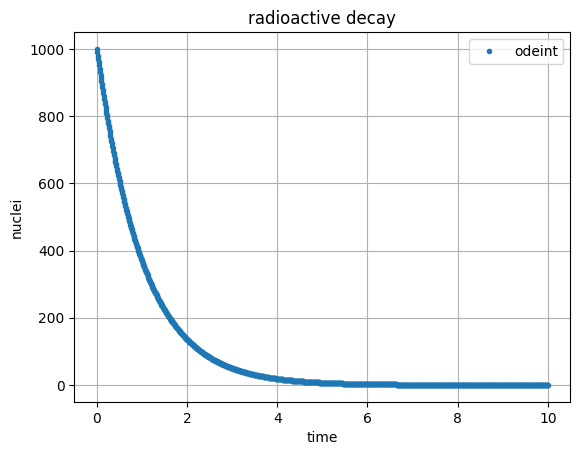

In [87]:
lam = 1.0
def f(y, t): # return derivative(s) of the array y
    return -lam*y

y_odeint = odeint(f, y0, t)

plt.plot(t, y_odeint,'.',label='odeint')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()

Let's compare this solution obtained with `odeint()` with the analytical solution:

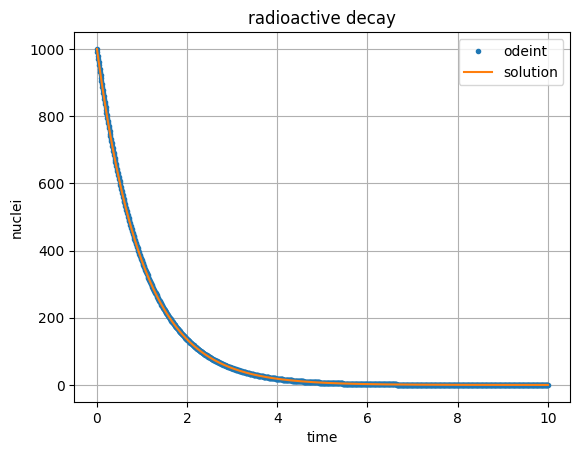

In [88]:
def solution(t): # return the analytic solution
    return y0*np.exp(-lam*t)

plt.plot(t, y_odeint,'.',label='odeint')
plt.plot(t, solution(t),label='solution')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()

We can also compare this methods to the Euler method that you used last year:

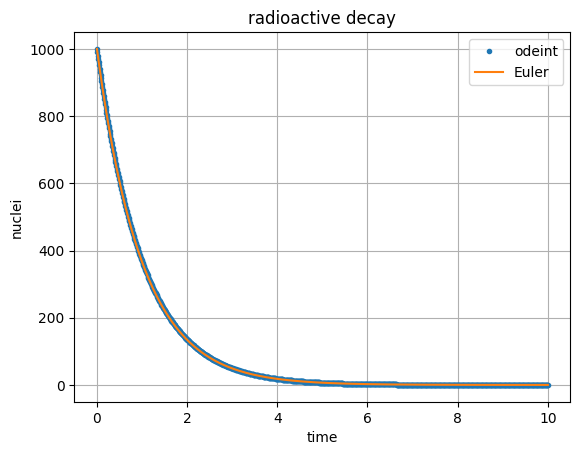

In [89]:
# use Euler's method to integrate equation for radioactive decay
# y_euler is the array for the solution y:
y_euler = np.zeros_like(t)
y_euler[0] = y0

dt = tmax/npts
for i in range(npts -1):
    y_euler[i+1] = y_euler[i] - lam*y_euler[i]*dt

plt.plot(t, y_odeint,'.',label='odeint')
plt.plot(t, y_euler, label='Euler')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()

## Improving the function definition

In order to be able to use a different value of $\lambda$ without modifying the function itself each time (that would be a very bad idea) you should modify the function definition and the way it is called like this:

In [90]:
npts = 1000 # Number of points
tmax = 10 # Maximum time

# setting up the time array:
t = np.linspace(0.0, tmax, npts)

def f(y, t, lam): # return derivative(s) of the array y
    return -lam*y

yinit = 1e3 # initial value
y_odeint = odeint(f, yinit, t, args=(2.0,))

The extra argument to the function needs to be passed to odeint as a “tuple” of values, i.e. a series of values in brackets separated by commas. So $\lambda$ is equal to 2.0 in this example.

## Solving several ODEs at once

The real power of `odeint` lies in the fact that it can solve several ODEs all at once, which can be coupled equations. Since we can transform a second order ODE into two coupled first order ODEs, you can immediately see why this is so useful.

Take the example of the ODE describing the displacement $y$ of a mass on a spring:

$$
m\frac{d^2y}{dt^2} = -ky
$$

Defining $y' = dy/dt$ (which is the velocity of the mass) we can re-write this second order ODE as the two first order ODEs:

$$
\begin{aligned}
\frac{dy}{dt} &= y' \\
\frac{dy'}{dt} &= -\frac{k}{m}y
\end{aligned}
$$

In order to work with these two derivatives, `odeint` needs them as elements of an array, so that `y` is a 2D array:

$$
\begin{aligned}
\frac{dy[0]}{dt} &= y[1] \\
\frac{dy[1]}{dt} &= -\frac{k}{m}y[0]
\end{aligned}
$$

$y[0]$ contains all the "zeroth" derivative as a function of time, and $y[1]$ the first derivatives. We modify the code defining the function and the way that `odeint` is used accordingly:

In [91]:
def f(y, t): # return derivatives of the array y
    k = 10.0
    m = 1.0
    return [ y[1], # the first equation dy[0]/dt
            -(k/m)*y[0] # the second equation dy[1]/dt
           ]

yinit = [0.1, 0] # TWO initial values, y and y'
y = odeint(f, yinit , t)

And y is indeed a 2D array, with the zeroth derivatives in the first column, and the first derivatives in the second column:

In [92]:
print(y)

[[ 0.1         0.        ]
 [ 0.0999499  -0.01000832]
 [ 0.09979967 -0.02000663]
 ...
 [ 0.09897162 -0.0452358 ]
 [ 0.09846931 -0.05511855]
 [ 0.09786833 -0.06494608]]


# Exercises


This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.**. Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

[0] Using the radioactive decay differential equation from the start of the worksheet, measure with `curve_fit()` the decay constant $\lambda$ from the (noisy) measurements of Oxygen-22 nuclei as a function of time from the file [ex0.txt](https://raw.githubusercontent.com/PX2134/data/master/week8/ex0.txt). The starting number of nuclei was `y0=100`.

(this exercise is for demonstration purposes and won't be marked)

**Note**: this is similar to question 4 of exercise 2...


In [93]:
def f(y, t, lam): # return derivative(s) of the array y
    return -lam*y

In [94]:
def func(t,lam):
  yinit=100
  y_odeint = odeint(f, yinit, t, args=(lam,))
  return y_odeint[:,0]

In [95]:
data=np.loadtxt('https://raw.githubusercontent.com/PX2134/data/master/week8/ex0.txt')

In [96]:
time=data[:,0]
y_data=data[:,1]

/tmp/ipython-input-2678284171.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


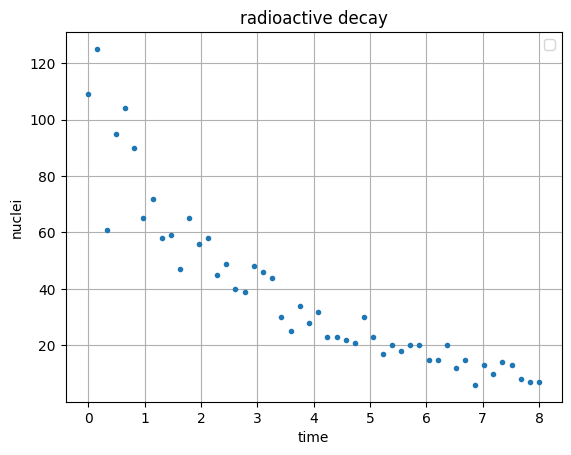

In [97]:
plt.plot(data[:,0],data[:,1],'.')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()

In [98]:
#plt.plot(func(time,1.))
a=func(time,1.)
#b=a[:,0]

In [99]:
from scipy.optimize import curve_fit

In [100]:
popt,pcov = curve_fit(func, time, y_data)

/tmp/ipython-input-2656179460.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


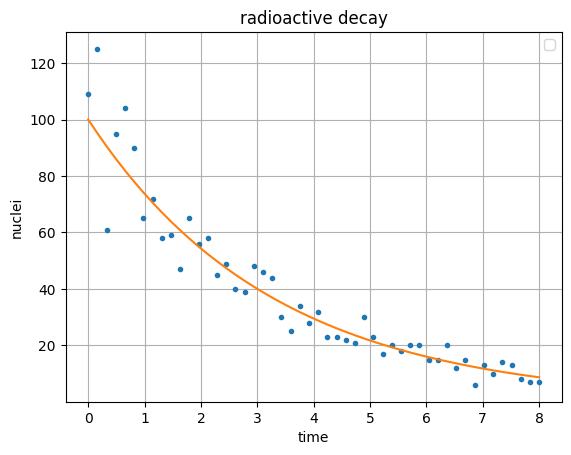

In [101]:
plt.plot(time,y_data,'.')
plt.plot(time,func(time,popt[0]))
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()

In [102]:
print('lamba: {0:.2f} +/- {1:.2f}')#.format(popt[0],np.sqrt(pcov.diagonal90[0]))

lamba: {0:.2f} +/- {1:.2f}


## Exercise 1

 (1). [2] Using the last Python snippet as a guide, solve the ODE for a mass on a spring and plot the result for a suitable range of time.

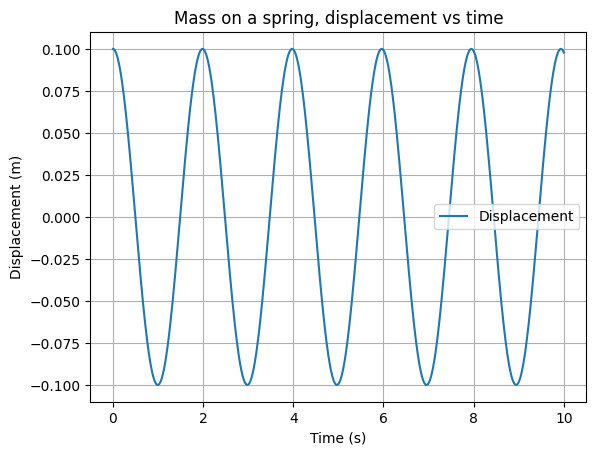

In [103]:
def f(y, t): # return derivative(s) of the array y
    k = 10.0
    m = 1.0
    return [ y[1], # dy/dt = velocity (y[1])
            -(k/m)*y[0] # dv/dt = acceleration (-(k/m)*position)
           ]

npoints = 1000 #Number of points
tmax = 10 #Max time

#Setting up time array
t = np.linspace(0.0, tmax, npoints)

#Initial conditions: initial displacement y=0.1, initial velocity y'=0
yinit = [0.1, 0]

y_solution = odeint(f, yinit, t)

plt.plot(t, y_solution[:, 0], label='Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Mass on a spring, displacement vs time')
plt.grid(True)
plt.legend()

 (2). [3] Modify your code so that the derivatives function accepts the parameters $k$ and $m$ instead of defining them within the function. Plot the results.

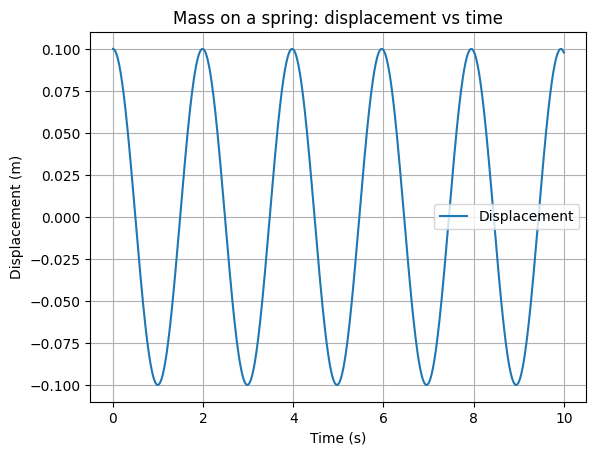

In [104]:
def f(y, t): #return derivatives of the array y
    k = 10.0
    m = 1.0
    return [ y[1], #dy/dt = velocity (y[1])
            -(k/m)*y[0] # dv/dt = acceleration (-(k/m)*position)
           ]

npoints = 1000 #Number of points
tmax = 10 #Max time

#Setting up time array
t = np.linspace(0.0, tmax, npoints)

#Initial conditions: initial displacement y=0.1, initial velocity y'=0
yinit = [0.1, 0]

y_solution = odeint(f, yinit, t)

plt.plot(t, y_solution[:, 0], label='Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Mass on a spring: displacement vs time')
plt.grid(True)
plt.legend()
plt.show()

 (3). [3] Finally, modify your code, with the above improvements to the function, to solve for the damped mass on a spring:

$$
\begin{aligned}
\frac{dy}{dt} &= y' \\
\frac{dy'}{dt} &= -\frac{k}{m}y -\frac{b}{m}\frac{dy}{dt}
\end{aligned}
$$

Modify your derivatives function to accept the damping parameter $b$ in addition to the parameter $k$ and $m$. Plot the results for $b=0.5$.


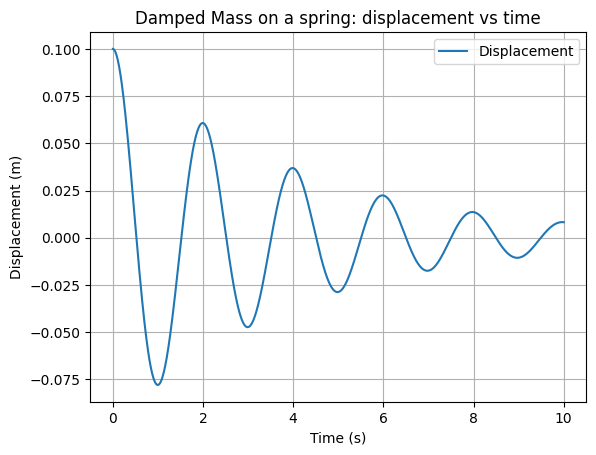

In [105]:
def f(y, t, k, m, b): #return derivatives of the array y. Accepting k, m, b as parameters
    return [ y[1], #dy/dt = velocity y[1]
            -(k/m)*y[0] - (b/m)*y[1] #dv/dt = acceleration and (-k/m * position - b/m * velocity)
           ]

npoints = 1000 #Number of points
tmax = 10 #Max time

#Setting up time array
t = np.linspace(0.0, tmax, npoints)

#Initial conditions: Initial displacement y=0.1, initial velocity y'=0
yinit = [0.1, 0]

#Define k, m, and b
k = 10.0
m = 1.0
b = 0.5 #Damping parameter

#Give k, m, and b to odeint
y_solution = odeint(f, yinit, t, args=(k, m, b))

plt.plot(t, y_solution[:, 0], label='Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title(f'Damped Mass on a spring: displacement vs time')
plt.grid(True)
plt.legend()
plt.show()

(4). [5] For the next question, you are trying to measure the spring constant $k$ and the damping parameter $b$ of a spring. You attach a known mass $m$ of 1.0 kg to the spring, move it `y0=0.5` meters from rest, release it at zero speed, and use a detector to measure its displacement as a function of time. Unfortunately this is a measurement done inside a nuclear reactor and there's a lot of noise on the detector... Your measurement is saved in the file [spring_measurement.txt](https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt).

- plot this file, the position of the mass at the end of the spring as a function of time

We will use `curve_fit()` to fit this data, the documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). As a quick summary: `curve_fit()` takes 3 mandatory arguments (the function to fit `func`, the data `x_data` to apply this function to, and the data `y_data` the fitting function will be tweaked to fit), e.g.:
```python
popt,pcov = curve_fit(func,x_data,y_data)
```
The return values are the list of best fit values `popt` and the corresponding covariance matrix `pcov`. The fitting function `func()` **must** have a specific signature: it must take the independent variable as the first argument and the parameters to fit as separate remaining arguments. For instance, it must be possible to have:
```python
y_predicted = func(x_data,some,guess,parameters)
```
And in that case, `y_predicted` would be compared to `y_data` by `curve_fit` to assess wether `[some,guess,parameters]` is a good fit for `y_data`.
`curve_fit` also accepts optional parameters, such as an initial guess `p0` (a list of parameters) for the initial fit parameters. You should always try to plot `y_initial_guess=func(x_data,*p0)`, the prediction of `func` with the inital guess, agains the data `y_data`.

- define a function which takes as input an array of time, and two parameters $k$ and $b$. It should call `odeint()` to solve the damped spring ODE with a fixed mass of 1kg, and return the array of positions corresponding to the array of time for that spring. You will need to define in the function the initial position, initial speed, and the mass. Use the function you defined above.

- call that function with some initial guess $k$ and $b$, and plot that prediction agains the data from `spring_measurement.txt`

- run `curve_fit` with the function you created and give your estimates for the spring constant and damping parameter of the spring. Make a plot if you want to check your answer.

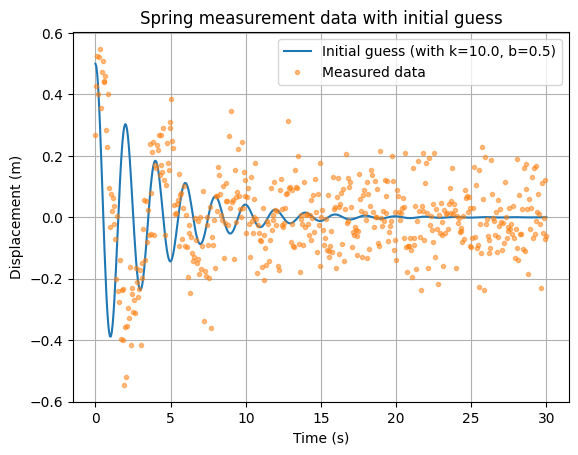

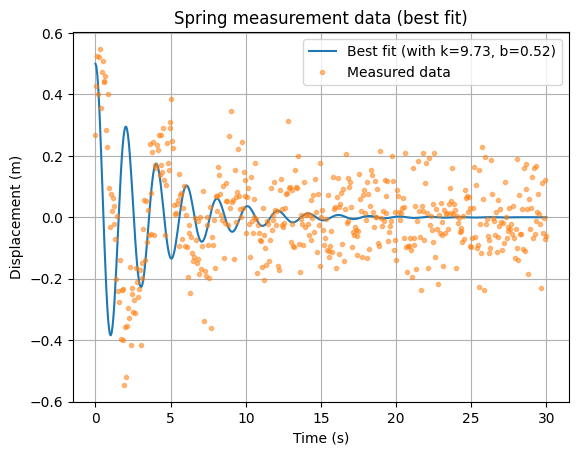

The best fit spring constant is k: 9.73
The best fit damping parameter is b: 0.52


In [106]:
#Loading the measurement data
data = np.loadtxt('https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt')
timedata = data[:, 0]
positiondata = data[:, 1]

#Defining derivatives function for damped oscillator
def dampedoscillatorderiv(y, t, k, m, b):
    #y[0] is position, y[1] is velocity
    #dy/dt = y[1] , is velocity
    #dv/dt = -(k/m)*y[0] - (b/m)*y[1] , is acceleration
    return [y[1], -(k/m)*y[0] - (b/m)*y[1]]

#Defining the function for curve_fit
def fit_func(t, k, b):
    m = 1.0 #known mass = 1.0 kg
    y0 = 0.5 #initial displacement = 0.5 m
    v0 = 0.0 #released at zero speed

    yinit_fit = [y0, v0]

    #Solving the ode for given k and b parameters
    solution = odeint(dampedoscillatorderiv, yinit_fit, t, args=(k, m, b))

    #curve_fit expects a 1D array of y-values so returning only the position (in the data's first column)
    return solution[:, 0]

#Defining initial guesses for k and b
kguess = 10.0 #Guess for k
bguess = 0.5 #Guess for b
initialguess = [kguess, bguess]

#Calculating and plotting the initial guess prediction
yinitialguess = fit_func(timedata, *initialguess)

plt.plot(timedata, yinitialguess, '-', label=f'Initial guess (with k={kguess}, b={bguess})')
plt.plot(timedata, positiondata, 'o', label='Measured data', markersize=3, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Spring measurement data with initial guess')
plt.grid(True)
plt.legend()
plt.show()

#Running curve_fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, time_data, position_data, p0=initial_guess_params)

#Extracting best-fit parameters and calculating predicted y values
k_fit, b_fit = popt
y_predicted_fit = fit_func(timedata, *popt)

#Plotting the raw data and the best-fit curve
plt.plot(timedata, y_predicted_fit, '-', label=f'Best fit (with k={k_fit:.2f}, b={b_fit:.2f})')
plt.plot(timedata, positiondata, 'o', label='Measured data', markersize=3, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Spring measurement data (best fit)')
plt.grid(True)
plt.legend()
plt.show()

#Printing  results
print(f"The best fit spring constant is k: {k_fit:.2f}")
print(f"The best fit damping parameter is b: {b_fit:.2f}")

## Exercise 2

[7] The driven van der Pol oscillator obeys the ODE:

$$
\frac{d^2y}{dt^2} - m(1 - y^2) \frac{dy}{dt} + y - A \sin(\omega t) = 0
$$

It is an example of a non-linear oscillator and can show mathematically chaotic behaviour.

Write the equation as two coupled first order ODEs and calculate its behaviour.

Plot graphs of $y$ versus $t$ and $y'$ versus $y$. The latter plot is called a "phase space plot" or "phase portrait".
(**Hint**: pick starting parameter values of $m = 8$, $A = 1$ and $\omega = 0.6$ and vary them to get interesting plots. You will need to pick a suitable range of time.)

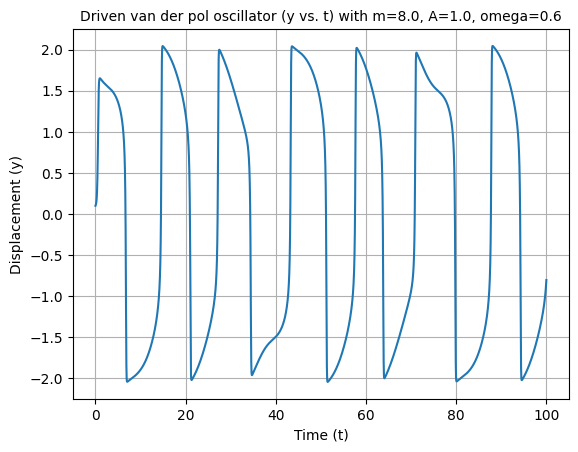

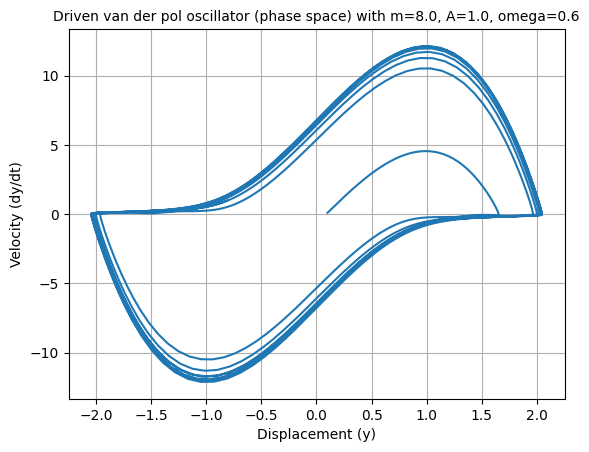

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Defining the derivative function for  driven Van der Pol oscillator
def vanderpolderiv(y_vec, t, m, A, omega):
    y = y_vec[0] #position
    dy_dt = y_vec[1] #velocity

    #first first order ODE (dy/dt = velocity)
    dydt_eq = dy_dt

    #second first order ODE (d(velocity)/dt = m(1 - y^2) * velocity - y + A * sin(omega * t))
    d2ydt2_eq = m * (1 - y**2) * dy_dt - y + A * np.sin(omega * t)

    return [dydt_eq, d2ydt2_eq]

#setting parameters, initial conditions, time array
m = 8.0 #damping parameter, mu
A = 1.0 #amplitude of driving force
omega = 0.6 #angular frequency of driving force

yinit = [0.1, 0.1] #initial conditions, [initial position, initial velocity]

#time array
tmax = 100
npoints = 10000
t = np.linspace(0.0, tmax, npoints)

#solving the ODE using odeint
sol = odeint(vanderpolderiv, yinit, t, args=(m, A, omega))

y = sol[:, 0] #position's solution
dy_dt = sol[:, 1] #velocity's solution

#plotting y vs t , displacement vs time
plt.plot(t, y, label='Displacement (y)')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (y)')
plt.title(f'Driven van der pol oscillator (y vs. t) with m={m}, A={A}, omega={omega}', fontsize=10)
plt.grid(True)
plt.show()

#plotting y' vs y (Phase space plot)
plt.plot(y, dy_dt, label='Phase Portrait')
plt.xlabel('Displacement (y)')
plt.ylabel('Velocity (dy/dt)')
plt.title(f'Driven van der pol oscillator (phase space) with m={m}, A={A}, omega={omega}', fontsize=10)
plt.grid(True)
plt.show()

# Task
Solve the ODE for a mass on a spring and plot the displacement over a suitable range of time. Use `scipy.integrate.odeint()` to find the solution. The ODE is given by: $\frac{dy}{dt} = y'$ and $\frac{dy'}{dt} = -\frac{k}{m}y$, with initial conditions $y(0)=0.1$ and $y'(0)=0$. Use $k=10.0$, $m=1.0$, and a time range from 0 to 10 with 1000 points. Plot the position `y[0]` against time, ensuring the plot has appropriate labels and a title.

## Define ODE function

### Subtask:
Define the Python function `f(y, t)` that returns the derivatives for the mass on a spring ODE. This function will take the state vector `y` (position and velocity) and time `t` as input, and return a list of the first derivatives `[dy/dt, dy'/dt]`.


**Reasoning**:
The subtask requires defining a Python function `f(y, t)` that calculates the derivatives for the mass on a spring ODE, as specified in the instructions. This function will be used by `odeint`.



In [108]:
def f(y, t): # return derivatives of the array y
    k = 10.0
    m = 1.0
    return [ y[1], # dy/dt = velocity (y[1])
            -(k/m)*y[0] # dv/dt = acceleration (-(k/m)*position)
           ]

## Set initial conditions and time

### Subtask:
Establish the initial conditions for the position and velocity of the mass, and set up the time array over which to solve the ODE.


**Reasoning**:
The subtask requires establishing the initial conditions for position and velocity and setting up the time array. This involves defining `npts` and `tmax`, creating the `t` array with `np.linspace`, and defining `yinit` as specified.



In [109]:
npts = 1000 # Number of points
tmax = 10 # Maximum time

# setting up the time array:
t = np.linspace(0.0, tmax, npts)

# Initial conditions: y[0] is position, y[1] is velocity
yinit = [0.1, 0] # Initial displacement y=0.1, initial velocity y'=0

## Solve ODE with odeint

### Subtask:
Use `scipy.integrate.odeint()` to solve the defined ODE with the specified initial conditions and time array. The output will be a 2D array containing the position and velocity over time.


**Reasoning**:
The subtask requires solving the ODE using `odeint` with the previously defined function `f`, initial conditions `yinit`, and time array `t`. The output will be stored in `y_solution`.



In [110]:
y_solution = odeint(f, yinit, t)
print("ODE solved successfully. The solution array 'y_solution' contains position and velocity over time.")

ODE solved successfully. The solution array 'y_solution' contains position and velocity over time.


## Plot results

### Subtask:
Plot the position (first column of the solution array) against time. Ensure the plot has appropriate labels for the x and y axes, a title, and a legend if necessary.


**Reasoning**:
The subtask requires plotting the position against time with appropriate labels and a title. I will use `matplotlib.pyplot` to create this plot.



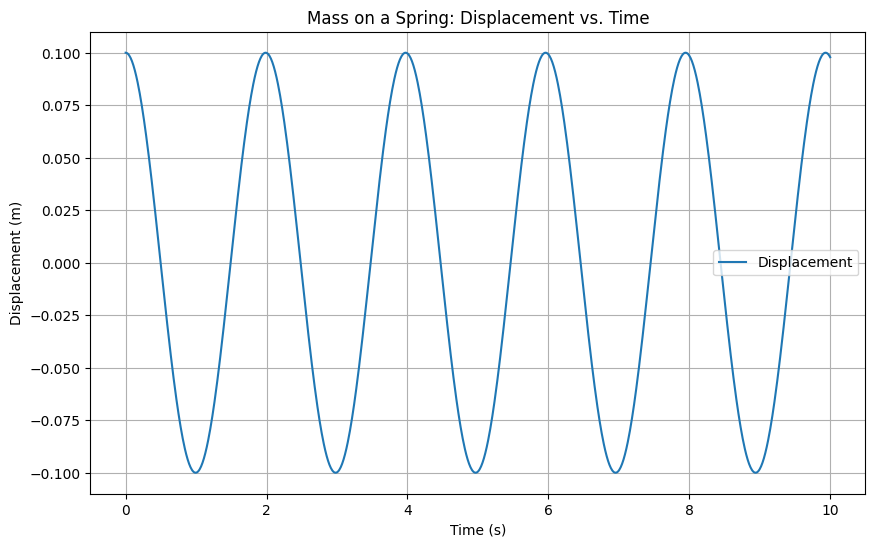

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(t, y_solution[:, 0], label='Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Mass on a Spring: Displacement vs. Time')
plt.grid(True)
plt.legend()
plt.show()

## Final Task

### Subtask:
Review the generated plot of the mass on a spring's displacement over time.


## Summary:

### Data Analysis Key Findings
*   The Ordinary Differential Equation (ODE) for a mass on a spring was successfully defined with constants $k=10.0$ and $m=1.0$. The function correctly calculates `dy/dt` (velocity) and `dy'/dt` (acceleration).
*   Initial conditions were set to an initial displacement of $0.1$ and an initial velocity of $0$.
*   A time range from $0$ to $10$ seconds was established with $1000$ points for the solution.
*   The `scipy.integrate.odeint()` function successfully solved the ODE, yielding a solution array (`y_solution`) containing the mass's position and velocity over the specified time.
*   A plot was generated visualizing the displacement of the mass over time, clearly labeled with "Time (s)" on the x-axis, "Displacement (m)" on the y-axis, and titled "Mass on a Spring: Displacement vs. Time".

### Insights or Next Steps
*   The periodic nature of the displacement plot confirms the expected oscillatory behavior of a simple harmonic oscillator.
*   To further analyze the system, one could plot the velocity over time, or create a phase space plot (velocity vs. position) to visualize the system's dynamics.


# Task
Set parameters, initial conditions, and time array for the driven van der Pol oscillator: Set `m=8`, `A=1`, `omega=0.6`. Define initial conditions `yinit = [0.1, 0.1]`. Create a time array `t` from 0 to 100 with 10000 points.

## Set parameters, initial conditions, and time array

### Subtask:
Set the parameter values `m=8`, `A=1`, `omega=0.6`. Define initial conditions for `y` and `y'` as `yinit = [0.1, 0.1]`. Create a time array `t` from 0 to 100 with 10000 points, as specified in the context.


## Summary:

### Data Analysis Key Findings
No data analysis has been performed in this step.

### Insights or Next Steps
*   The immediate next step is to define the specific parameters for the driven van der Pol oscillator: `m=8`, `A=1`, `omega=0.6`. Additionally, initial conditions `yinit = [0.1, 0.1]` need to be set, and a time array `t` from 0 to 100 with 10000 points must be created.
